<a href="https://colab.research.google.com/github/HwangHanJae/ml-definitive-guide-pratice/blob/main/regression/gradient_descent_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 비용 최소화 하기 - 경사 하강법(Gradient Descent) 소개
- 비용 함수(RSS)를 최소화하는 방법을 직관적으로 제공
- '데이터를 기반으로 알고리즘이 스스로 학습한다'는 머신러닝 개념을 가능하게 만들어준 핵심 기법
- '점진적으로' 반복적인 계산을 통해 $w$ 파라미터 값을 업데이트 하면서 오류 값이 최소가되는 $w$ 파라미터를 구하는 방식
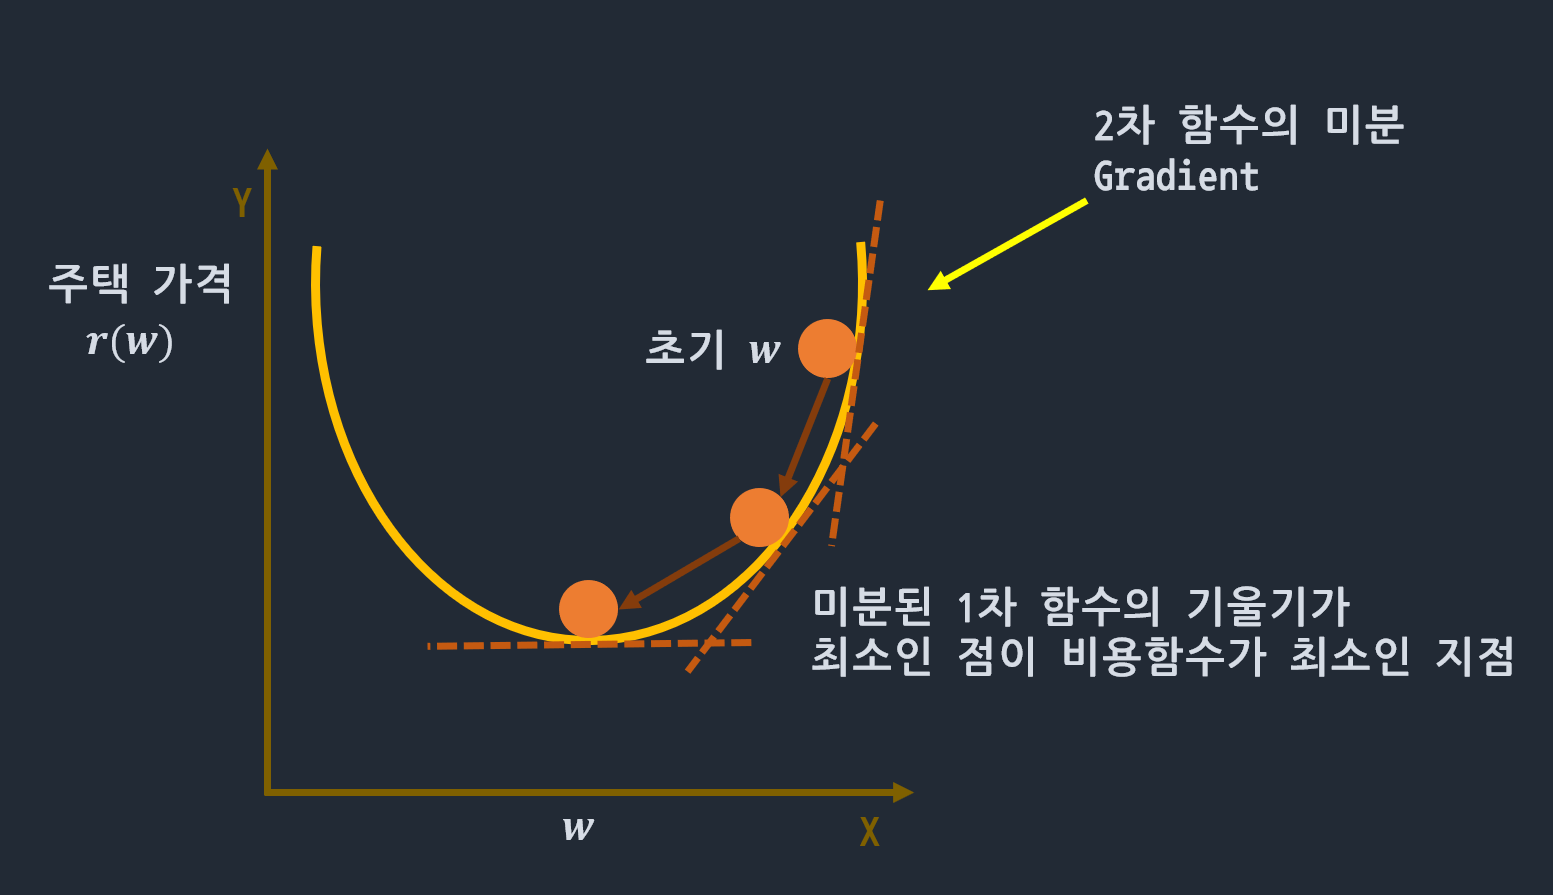

경사하강법의 핵심은 "어떻게 하면 오류가 작아지는 방향으로 $w$의 값을 보정할 수 있을까" 이다.  
포물선 형태의 2차 함수의 최저점은 2차함수의 미분 값인 1차 함수의 기울기가 최소일때  

위의 그림은
1. 최초 w에서 부터 미분을 적용한 뒤 이 미분 값이 계속 감소하는 방향으로 순차적으로 w를 업데이터함.
2. 더이상 미분된 1차함수의 기울기가 감소하지 않는 지점을 비용함수가 최소인 지점으로 간주하고 그때의 $w$를 반환함

비용함수 $RSS(w_0, w_1)$는 편의상 $R(w)$로 지칭하겠음
- $R(w)$는 변수가 $w$ 파라미터로 이뤄진 함수

$R(w) = \frac{1}{N}\sum_{i=1}^{N}(y_i-(w_0+w_1*x_i))^2$  
위의 식에서 미분 함수의 최솟값을 구할때 $w_0$와$w_1$의 값을 각각 순차적으로 편미분을 수행해 얻을 수 있음

$R(w)$를 $w_0,w_1$으로 편미분한 결과는 다음과 같음
$$\frac{\partial R(w)}{\partial w_0} = \frac{2}{N}\sum_{i=1}^{N}-(y_i-(w_0+w_1x_i)) = -\frac{2}{N}\sum_{i=1}^{N}(실제값_i - 예측값_i)$$

$$\frac{\partial R(w)}{\partial w_1} = \frac{2}{N}\sum_{i=1}^{N}-x_i*(y_i-(w_0+w_1x_i)) = -\frac{2}{N}\sum_{i=1}^{N}x_i*(실제값_i - 예측값_i)$$

편미분의 결과값인 $-\frac{2}{N}\sum_{i=1}^{N}(실제값_i - 예측값_i)$,$-\frac{2}{N}\sum_{i=1}^{N}x_i*(실제값_i - 예측값_i)$을 반복적으로 보정하면서  
$w_0, w_1$값을 업데이트 하면서 비용함수$R(w)$가 최소가 되는 $w_0, w_1$의 값을 구할 수 있음  

하지만 실제로는 위 편미분값이 너무 클 수 있기 때문에 보정계수 $\eta$를 곱하는데  
$\eta$를 **학습률**이라고 함

**학습률**을 반영하여 경사하강법은
$$새로운\;w_0 = 이전 \; w_0-\eta\frac{2}{N}\sum_{i=1}^{N}(실제값_i - 예측값_i)$$
$$새로운\;w_1 = 이전 \; w_1-\eta\frac{2}{N}\sum_{i=1}^{N}x_i*(실제값_i-예측값_i)$$

을 반복적으로 적용하면서 비용함수가 최소가 되는 값을 찾음

## 경사하강법의 일반적인 프로세스
Step1. $w_0, w_1$를 임의이 값으로 설정하고 첫 비용 함수의 값을 계산한다.  
Step2. $w_1$을 $w_1-\eta\frac{2}{N}\sum_{i=1}^{N}x_i*(실제값_i-예측값_i)$,  
$\qquad w_0$을 $w_0-\eta\frac{2}{N}\sum_{i=1}^{N}(실제값_i - 예측값_i)$  
업데이트한 후 다시 비용함수의 값을 계산  
Step3. 비용 함수의 값이 감소했으면 다시 Step 2를 반복하고 더 이상 비용 함수의 값이 감소하지 않으면 그때의 $w_1,w_0$를 구하고 반복을 중지
        

### 간단한 예제를 코드로 구현
1. 간단한 회귀식인 $y = 4X + 6$에 근사하기 위한 100개의 데이터 세트를 만듬
2. 여기에 경사 하강법을 이용하여 회귀계수 $w_1$을 4에 가까운 값으로 $w_0$을 6에 가까운 값으로 도출

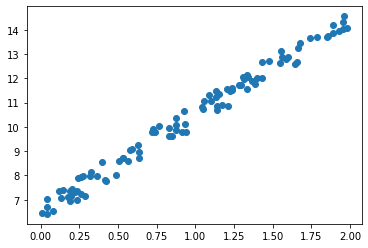

In [2]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
#y = 4X + 6을 근사 (w1=4, w0 = 6)임의의 값을 노이즈를 위해 만듬
X =  2 * np.random.rand(100,1)
y = 6+ 4* X + np.random.rand(100,1)
#X, y 데이터 세트를 산점도로 시각화
plt.scatter(X, y)
plt.show()

$w_0, w_1$을 업데이트할 값을 구하는 함수인 get_weight_updates()함수를 생성

In [8]:
#w1과 w0를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
  N = len(X)
  #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0값으로 초기화
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  #예측 배열 계산하고 예측과 실제 값의 차이 게산
  y_pred = np.dot(X, w1.T) + w0
  diff = y-y_pred

  #w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
  w0_factors = np.ones((N,1))

  #w1과 w0를 업데이트할 w1_update, w0_update를 계산
  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))

  return w1_update, w0_update

$w_1, w_0$를 모두 0으로 초기화한 뒤 특정 횟수만큼 반복하면서 $w_1, w_0$를 업데이트함

즉 $새로운\;w_0 = 이전 \; w_0-\eta\frac{2}{N}\sum_{i=1}^{N}(실제값_i - 예측값_i)$,
$새로운\;w_1 = 이전 \; w_1-\eta\frac{2}{N}\sum_{i=1}^{N}x_i*(실제값_i-예측값_i)$  
을 반복적으로 적용하면서 $w_1$과$w_0$을 업데이트 하는 것

다음은 get_weight_updates()을 경사 하강 방식으로 반복적으로 수행하여 w1과 w0를 업데이트 하는 함수인 gradient_descent_steps() 함수를 생성

In [9]:
def gradient_descent_steps(X,y,iters = 10000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))

  #인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행
  for ind in range(iters):
    w1_update, w0_update = get_weight_updates(w1, w0, X,y,learning_rate=0.01)
    w1 = w1 - w1_update
    w0 = w0 - w0_update

  
  return w1, w0

최종적으로 예측값과 실제값의 RSS 차이를 계산하는 get_cost()함수를 생성하고 이를 이용해 경사 하강법의 예측 오류도 계산

In [26]:
def get_cost(y, y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

w1과 w0를 구해보겠음

In [28]:
w1, w0 = gradient_descent_steps(X,y,iters = 1000)
print("w1 : {0:.3f}, w0 : {1:.3f}".format(w1[0,0], w0[0, 0]))
y_pred = w1[0,0] * X +w0
print("Gradient Descent Total Cost : {0:.4f}".format(get_cost(y, y_pred)))

w1 : 4.028, w0 : 6.490
Gradient Descent Total Cost : 0.0775


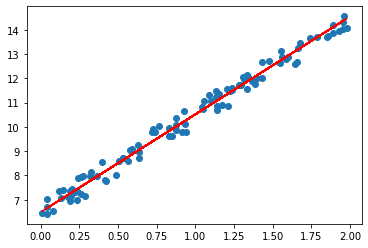

In [20]:
plt.scatter(X,y)
plt.plot(X, y_pred,'r')
plt.show()

위에서 구한 y_pred에 기반하여 만든 회귀선이 잘만들어진것을 확인할 수 있음

일반적으로 경사하강법은 모든 학습 데이터에 대하여 반복적으로 비용함수 최소화를 위한 값을 업데이트하기 때문에 수행시간이 매우 오래 걸림  
따라서 실전에서는 확률적 경사 하강법(Stochastic Gradient Descent)를 이용함

## 확률적 경사 하강법(Stochastic Gradient Descent)
- 전체 입력 데이터로 w가 업데이트 되는 값을 계산 하는 것이 아니라 일부 데이터만 이용해 w가 업데이트되는 값을 계산하므로 경사 하강법에 비해서 빠른 속도를 보장함
- 대용량의 경우 확률적 경사 하강법이나 미니배치 확률적 경사하강법을 이용함

###(미니배치) 확률적 경사 하강법을 코드로 구현

In [21]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
  w0 = np.zeros((1,1))
  w1 = np.zeros((1,1))
  prev_cost = 100000
  iter_index= 0 
  for ind in range(iters):
    np.random.seed(ind)
    #전체 X, y 데이터에서 랜덤하게 batch_size 만큼 데이터를 추출해 sample_X, sample_y로 저장
    stochastic_random_index = np.random.permutation(X.shape[0])
    sample_X = X[stochastic_random_index[0:batch_size]]
    sample_y = y[stochastic_random_index[0:batch_size]]


    #랜덤하게 batch_size 만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
    w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
    w1 = w1-w1_update
    w0 = w0-w0_update

  return w1, w0

In [27]:
w1, w0 = stochastic_gradient_descent_steps(X,y, iters=1000)
print("w1 : {}, w0 : {}".format(round(w1[0,0],3), round(w0[0, 0],3)))
y_pred = w1[0,0] * X +w0
print("Gradient Descent Total Cost : {0:.4f}".format(get_cost(y, y_pred)))

w1 : 4.031, w0 : 6.486
Gradient Descent Total Cost : 0.0777
